# Saint-Venent's principle

## Initialization

In [1]:
import getfem as gf
import numpy as np
import pyvista as pv

## Parameters of the model

In [2]:
E = 21E6
nu = 0.3
clambda = E*nu/((1+nu)*(1-2*nu))
cmu = E/(2*(1+nu))

## Mesh generation

In [3]:
H = 2.0

DX = DY = DZ = H / 2.0
X = np.arange(0.0, 10 * H / 2 + DX, DX)
Y = np.arange(0.0, H / 2 + DY, DY)
Z = np.arange(0.0, H / 2 + DZ, DZ)

m = gf.Mesh("cartesian", X, Y, Z)

## Boundary selection

In [4]:
fb1 = m.outer_faces_with_direction([1.0, 0.0, 0.0], 0.01)
fb2 = m.outer_faces_with_direction([-1.0, 0.0, 0.0], 0.01)
fb3 = m.outer_faces_with_direction([0.0, -1.0, 0.0], 0.01)
fb4 = m.outer_faces_with_direction([0.0, 0.0, -1.0], 0.01)

RIGHT_BOUND = 1
LEFT_BOUND = 2
BOTTOM_BOUND = 3
BEFORE_BOUND = 4

m.set_region(RIGHT_BOUND, fb1)
m.set_region(LEFT_BOUND, fb2)
m.set_region(BOTTOM_BOUND, fb3)
m.set_region(BEFORE_BOUND, fb4)

## Mesh draw

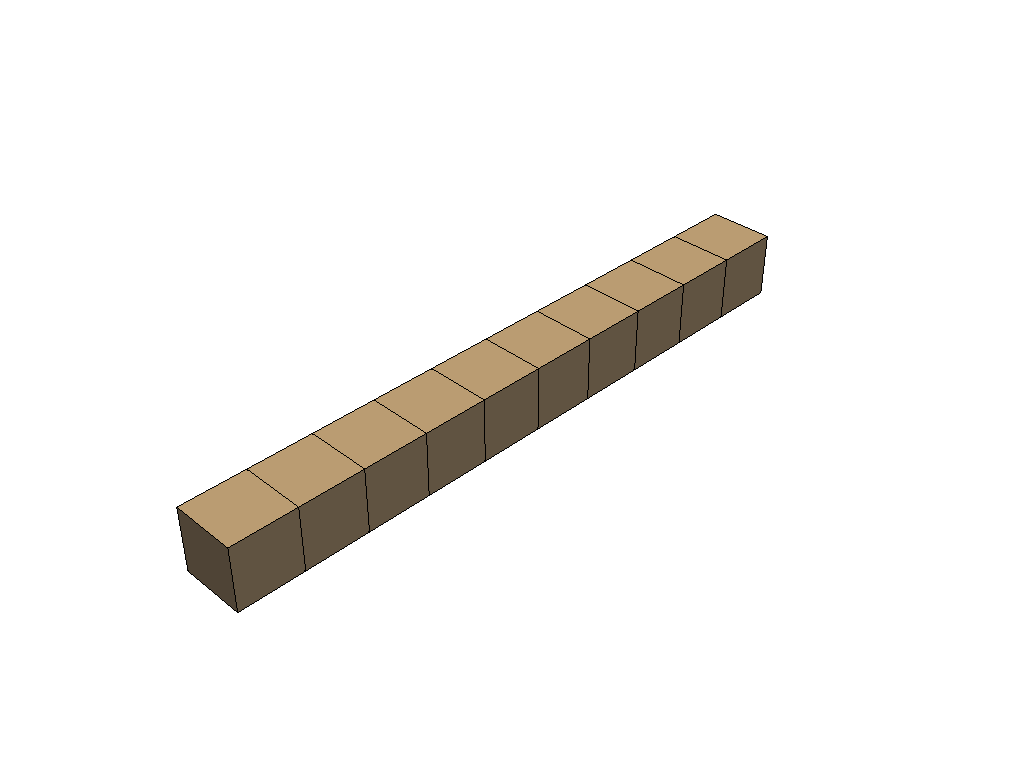

In [5]:
export_file_name = "m.vtk"
m.export_to_vtk(export_file_name)
mesh = pv.read(export_file_name)
mesh.plot(show_edges=True, color=True)

In [6]:
mfu = gf.MeshFem(m, 3)

In [7]:
elements_degree = 1
mfu.set_classical_fem(elements_degree)

In [8]:
mim = gf.MeshIm(m, elements_degree*2)

In [9]:
md = gf.Model("real")

In [10]:
md.add_fem_variable("u", mfu)

In [11]:
md.add_isotropic_linearized_elasticity_brick?

Signature:
md.add_isotropic_linearized_elasticity_brick(
    mim,
    varname,
    dataname_lambda,
    dataname_mu,
    region=None,
)
Docstring:
Add an isotropic linearized elasticity term to the model relatively to
the variable `varname`. `dataname_lambda` and `dataname_mu` should
contain the Lame coefficients. `region` is an optional mesh region
on which the term is added. If it is not specified, it is added
on the whole mesh. Return the brick index in the model.
File:      /usr/lib/python3/dist-packages/getfem/getfem.py
Type:      method


In [12]:
md.add_initialized_data("lambda", clambda)
md.add_initialized_data("mu", cmu)

In [13]:
md.add_isotropic_linearized_elasticity_brick(mim, "u", "lambda", "mu")

0